In [3]:
import torch as th
from torch import nn

import torchaudio

import numpy as np
import matplotlib.pyplot as plt

import librosa
import scipy.io.wavfile as wav

import speechbrain as sb
from speechbrain.lobes.models.Xvector import Xvector


# Por reproducibilidad
th.manual_seed(42)
np.random.seed(42)

DC = 'cuda:0' if th.cuda.is_available() else 'cpu'

*X-vector*

In [5]:
compute_xvect = Xvector('cpu')
input_feats = th.rand([5, 10, 40])
outputs = compute_xvect(input_feats)
outputs.shape

torch.Size([5, 1, 512])

In [7]:
Xvector()

Xvector(
  (blocks): ModuleList(
    (0): Conv1d(
      (conv): Conv1d(40, 512, kernel_size=(5,), stride=(1,))
    )
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm1d(
      (norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): Conv1d(
      (conv): Conv1d(512, 512, kernel_size=(3,), stride=(1,), dilation=(2,))
    )
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm1d(
      (norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (6): Conv1d(
      (conv): Conv1d(512, 512, kernel_size=(3,), stride=(1,), dilation=(3,))
    )
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm1d(
      (norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (9): Conv1d(
      (conv): Conv1d(512, 512, kernel_size=(1,), stride=(1,))
    )
    (10): LeakyReLU(negative_slope=0.01)
    (11): BatchNorm1d(
      (norm): BatchNorm1d(512, eps=1e-05, mom

Quartznet x-vector

In [23]:
import nemo.collections.asr as nemo_asr

model = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_es_quartznet15x5")

[NeMo I 2023-11-13 11:57:34 cloud:68] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/stt_es_quartznet15x5/versions/1.0.0rc1/files/stt_es_quartznet15x5.nemo to C:\Users\93004\.cache\torch\NeMo\NeMo_1.21.0\stt_es_quartznet15x5\a65f9c865cfd58f57bfba25a7e44e8e2\stt_es_quartznet15x5.nemo
[NeMo I 2023-11-13 11:57:49 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2023-11-13 11:57:50 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /raid/noneval.json
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    - á
    - é
    - í
    - ó
    - ú
    - ñ
    - ü
    batch_size: 16
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    num_workers: 8
    pin_memory: true
    
[NeMo W 2023-11-13 11:57:50 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup th

[NeMo I 2023-11-13 11:57:50 features:289] PADDING: 16
[NeMo I 2023-11-13 11:57:51 save_restore_connector:249] Model EncDecCTCModel was successfully restored from C:\Users\93004\.cache\torch\NeMo\NeMo_1.21.0\stt_es_quartznet15x5\a65f9c865cfd58f57bfba25a7e44e8e2\stt_es_quartznet15x5.nemo.


In [22]:
from nemo.collections.asr.models import ASRModel

# Lista de modelos ASR disponibles
available_models = ASRModel.list_available_models()

# Imprimir la lista de modelos
print("Modelos ASR disponibles:")
for model in available_models:
    print(model)


Modelos ASR disponibles:
PretrainedModelInfo(
	pretrained_model_name=QuartzNet15x5Base-En,
	description=QuartzNet15x5 model trained on six datasets: LibriSpeech, Mozilla Common Voice (validated clips from en_1488h_2019-12-10), WSJ, Fisher, Switchboard, and NSC Singapore English. It was trained with Apex/Amp optimization level O1 for 600 epochs. The model achieves a WER of 3.79% on LibriSpeech dev-clean, and a WER of 10.05% on dev-other. Please visit https://ngc.nvidia.com/catalog/models/nvidia:nemospeechmodels for further details.,
	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemospeechmodels/versions/1.0.0a5/files/QuartzNet15x5Base-En.nemo,
	class_=<class 'nemo.collections.asr.models.ctc_models.EncDecCTCModel'>
)
PretrainedModelInfo(
	pretrained_model_name=asr_talknet_aligner,
	description=For details about this model, please visit https://ngc.nvidia.com/catalog/models/nvidia:nemo:asr_talknet_aligner,
	location=https://api.ngc.nvidia.com/v2/models/nvidia/nemo/asr_talknet_alig

In [19]:
model

EncDecCTCModel(
  (preprocessor): AudioToMelSpectrogramPreprocessor(
    (featurizer): FilterbankFeatures()
  )
  (encoder): ConvASREncoder(
    (encoder): Sequential(
      (0): JasperBlock(
        (mconv): ModuleList(
          (0): MaskedConv1d(
            (conv): Conv1d(64, 64, kernel_size=(33,), stride=(2,), padding=(16,), groups=64, bias=False)
          )
          (1): MaskedConv1d(
            (conv): Conv1d(64, 256, kernel_size=(1,), stride=(1,), bias=False)
          )
          (2): BatchNorm1d(256, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        )
        (mout): Sequential(
          (0): ReLU(inplace=True)
          (1): Dropout(p=0.0, inplace=False)
        )
      )
      (1): JasperBlock(
        (mconv): ModuleList(
          (0): MaskedConv1d(
            (conv): Conv1d(256, 256, kernel_size=(33,), stride=(1,), padding=(16,), groups=256, bias=False)
          )
          (1): MaskedConv1d(
            (conv): Conv1d(256, 256, kernel_size=(1

*Wav2Vec*

In [2]:
bundle = torchaudio.pipelines.WAV2VEC2_BASE

model = bundle.get_model()

In [3]:
waveform, sample_rate = torchaudio.load("D:/Dtataset 2/1/cut30/0000_portuguese_nonscripted_1.wav")


In [4]:
audio_data, fs = librosa.load("D:/Dtataset 2/1/cut30/0000_portuguese_nonscripted_1.wav", sr=16000)

In [5]:
# audio_data
extended_wav = th.from_numpy(audio_data)
extended_wav.reshape(1, -1)

print(extended_wav.shape)

torch.Size([480000])


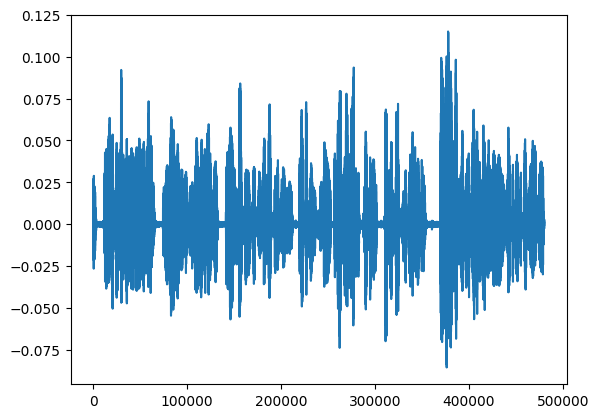

In [6]:
plt.figure()
plt.plot(extended_wav.numpy())

In [7]:
waveform.size()

torch.Size([2, 1323000])

In [8]:
# !pip install pydub
import IPython as ip
from pydub import AudioSegment

c:\Users\93004\anaconda3\envs\Audio\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [9]:
waveform.size()

torch.Size([2, 1323000])

In [10]:
waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)

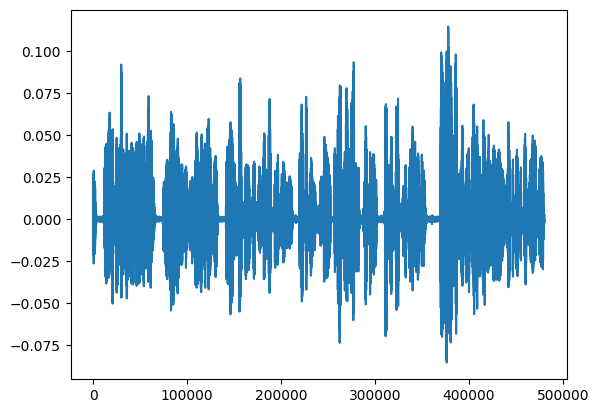

In [11]:
waveform[0].size()
plt.figure()
plt.plot(waveform[0,:].numpy())

In [12]:
ip.display.Audio(waveform, rate=bundle.sample_rate)

In [13]:
features, _ = model.extract_features(waveform)

features[0].shape

torch.Size([2, 1499, 768])

In [14]:
features[11].shape
# bundle

torch.Size([2, 1499, 768])

In [15]:
len(features)

12

In [5]:
from importlib import reload
import utils_wav

# Luego, puedes recargar el módulo
reload(utils_wav)


<module 'utils_wav' from '/mnt/b6ae129f-d10f-42f6-b488-51e80af70cd1/AixaPL/Version1/PCIC23/x-vector/utils_wav.py'>

In [1]:
import IPython as ip

In [1]:
from utils_wav import utils_wav

In [2]:
utils_mine = utils_wav('../downloadFiles/CCv2_part_10_audios/0639_portuguese_scripted_0.wav')

Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /home/ar/.cache/torch/hub/master.zip


In [4]:
utils_mine.cleanAudio('../downloadFiles/CCv2_part_10_audios/0630_portuguese_nonscripted_1.wav',"../downloadFiles/clean_CCv2_part_10_audios")

[{'end': 430560, 'start': 46624},
 {'end': 474592, 'start': 456224},
 {'end': 532960, 'start': 478752},
 {'end': 594400, 'start': 537120},
 {'end': 630240, 'start': 600608},
 {'end': 725472, 'start': 638496},
 {'end': 776672, 'start': 736800}]
7
../downloadFiles/clean_CCv2_part_10_audios


In [9]:
waveform , sample_rate = utils_mine.cut_wav(audio="/home/ar/Data/AixaPL/Version1/PCIC23/downloadFiles/CCv2_part_10_audios/0639_portuguese_scripted_0.wav")

ip.display.Audio(waveform, rate=sample_rate)

AUDIO /home/ar/Data/AixaPL/Version1/PCIC23/downloadFiles/CCv2_part_10_audios/0639_portuguese_scripted_0.wav
MoviePy - Writing audio in audio_temporal.wav


MoviePy - Done.


RuntimeError: Couldn't find appropriate backend to handle uri audio_temporal.wav and format None.

In [6]:
waveform.shape

torch.Size([2, 1323000])